In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, confusion_matrix, RocCurveDisplay
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from xgboost import XGBClassifier

from lightgbm import LGBMClassifier

In [1]:
def full_read_and_bool_to_int(path):
  data = pd.read_csv(path)
  data['TotalSpent'] = data['TotalSpent'].replace(' ', 0) #
  data['TotalSpent'] = np.float64(data['TotalSpent'])

  return data.copy()


In [3]:
train = full_read_and_bool_to_int('/content/drive/MyDrive/Dataset/churn_train.csv')
test =  full_read_and_bool_to_int('/content/drive/MyDrive/Dataset/churn_test.csv')

In [4]:
num_cols = ['ClientPeriod',
            'MonthlySpending',
            'TotalSpent'
            ]

cat_cols = ['HasInternetService',
            'HasMultiplePhoneNumbers',
            'HasOnlineSecurityService',
            'HasOnlineBackup',
            'HasDeviceProtection',
            'HasTechSupportAccess',
            'HasOnlineTV',
            'HasMovieSubscription',
            'HasContractPhone',
            'PaymentMethod'
            ]

bool_cols = ['IsBillingPaperless',
             'HasChild',
             'HasPartner',
             'Sex',
             'HasPhoneService',
             'IsSeniorCitizen',
             'Churn'
             ]

In [5]:
train.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.20,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.90,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570.00,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


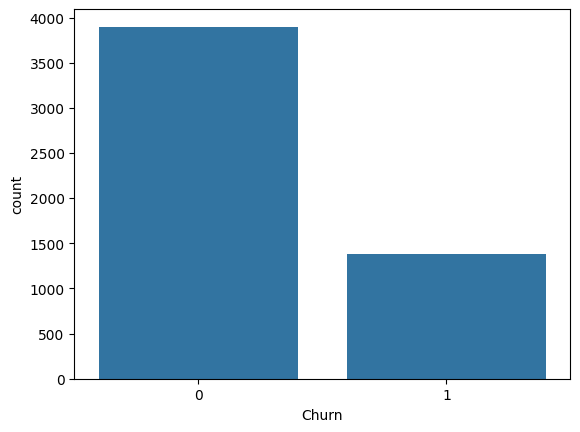

In [7]:
sns.countplot(x=train['Churn'])
plt.show()

In [ ]:
train.isna().sum()

,0
ClientPeriod,0
MonthlySpending,0
TotalSpent,0
Sex,0
IsSeniorCitizen,0
HasPartner,0
HasChild,0
HasPhoneService,0
HasMultiplePhoneNumbers,0
HasInternetService,0


In [ ]:
test.isna().sum()

,0
ClientPeriod,0
MonthlySpending,0
TotalSpent,0
Sex,0
IsSeniorCitizen,0
HasPartner,0
HasChild,0
HasPhoneService,0
HasMultiplePhoneNumbers,0
HasInternetService,0


In [ ]:
train.describe()

,ClientPeriod,MonthlySpending,TotalSpent,IsSeniorCitizen,Churn
count,5282.000000,5282.000000,5282.000000,5282.000000,5282.000000
mean,32.397009,64.924754,2287.486161,0.159409,0.262022
std,24.550326,30.176464,2269.049195,0.366092,0.439776
min,0.000000,18.250000,0.000000,0.000000,0.000000
25%,9.000000,35.462500,395.725000,0.000000,0.000000
50%,29.000000,70.400000,1405.650000,0.000000,0.000000
75%,55.000000,90.050000,3795.212500,0.000000,1.000000
max,72.000000,118.750000,8684.800000,1.000000,1.000000


## Анализ числовых переменных

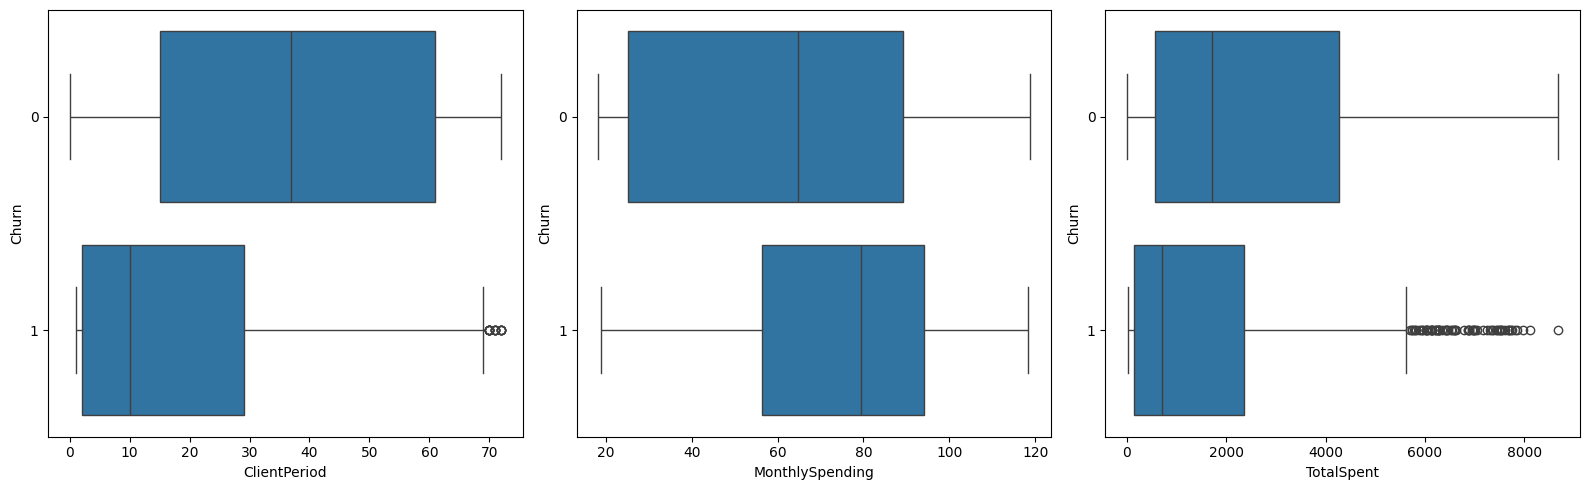

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 5))

sns.boxplot(x=train['ClientPeriod'], y=train['Churn'], ax=ax1, orient='h')
sns.boxplot(x=train['MonthlySpending'], y=train['Churn'], ax=ax2, orient='h')
sns.boxplot(x=(train['TotalSpent']), y=train['Churn'], ax=ax3, orient='h')

plt.tight_layout()
plt.show()

## Анализ категориальных переменных

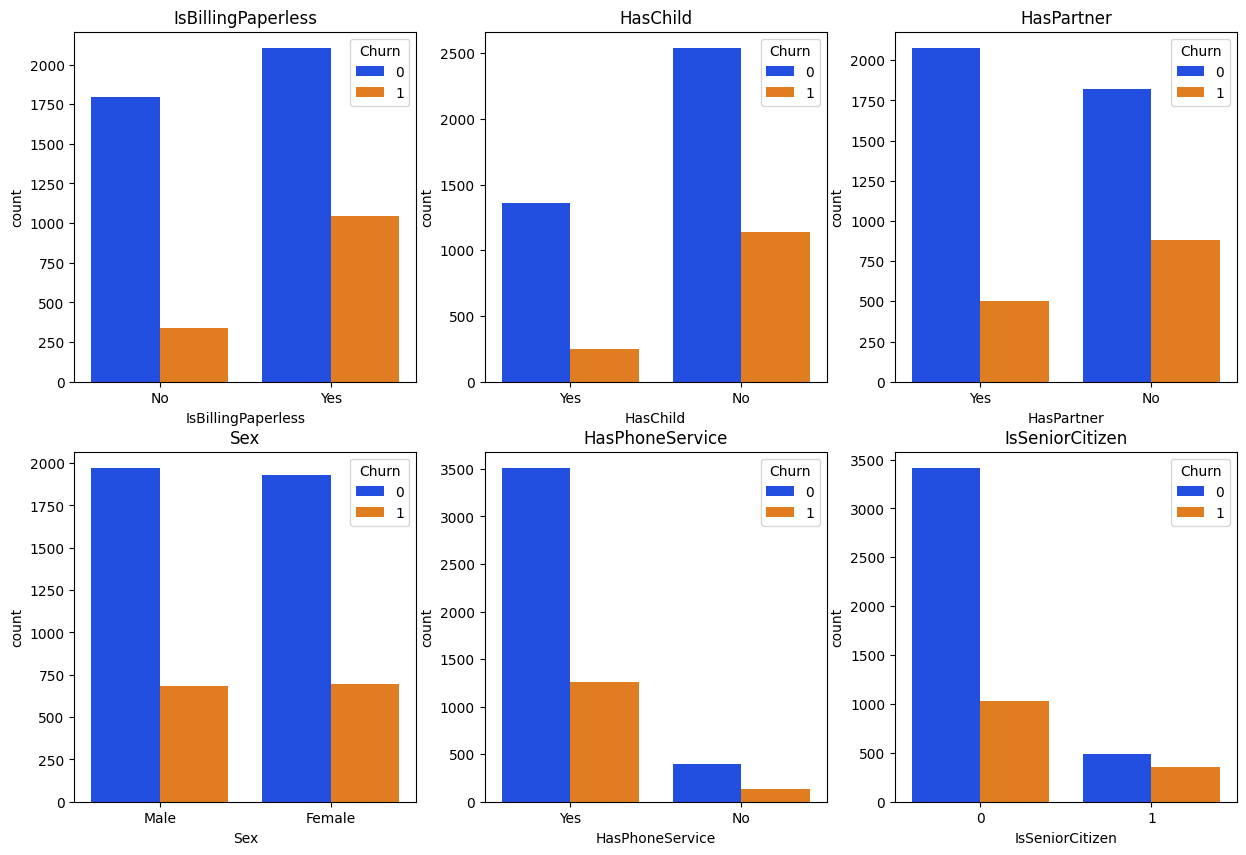

In [8]:
fig, axes = plt.subplots(2, 3, figsize=(15,10))

for i, ax in enumerate(axes.flat):
  sns.countplot(x=train[bool_cols[i]], hue=train['Churn'], palette='bright',ax=ax)
  ax.set_title(f'{bool_cols[i]}')

plt.show()

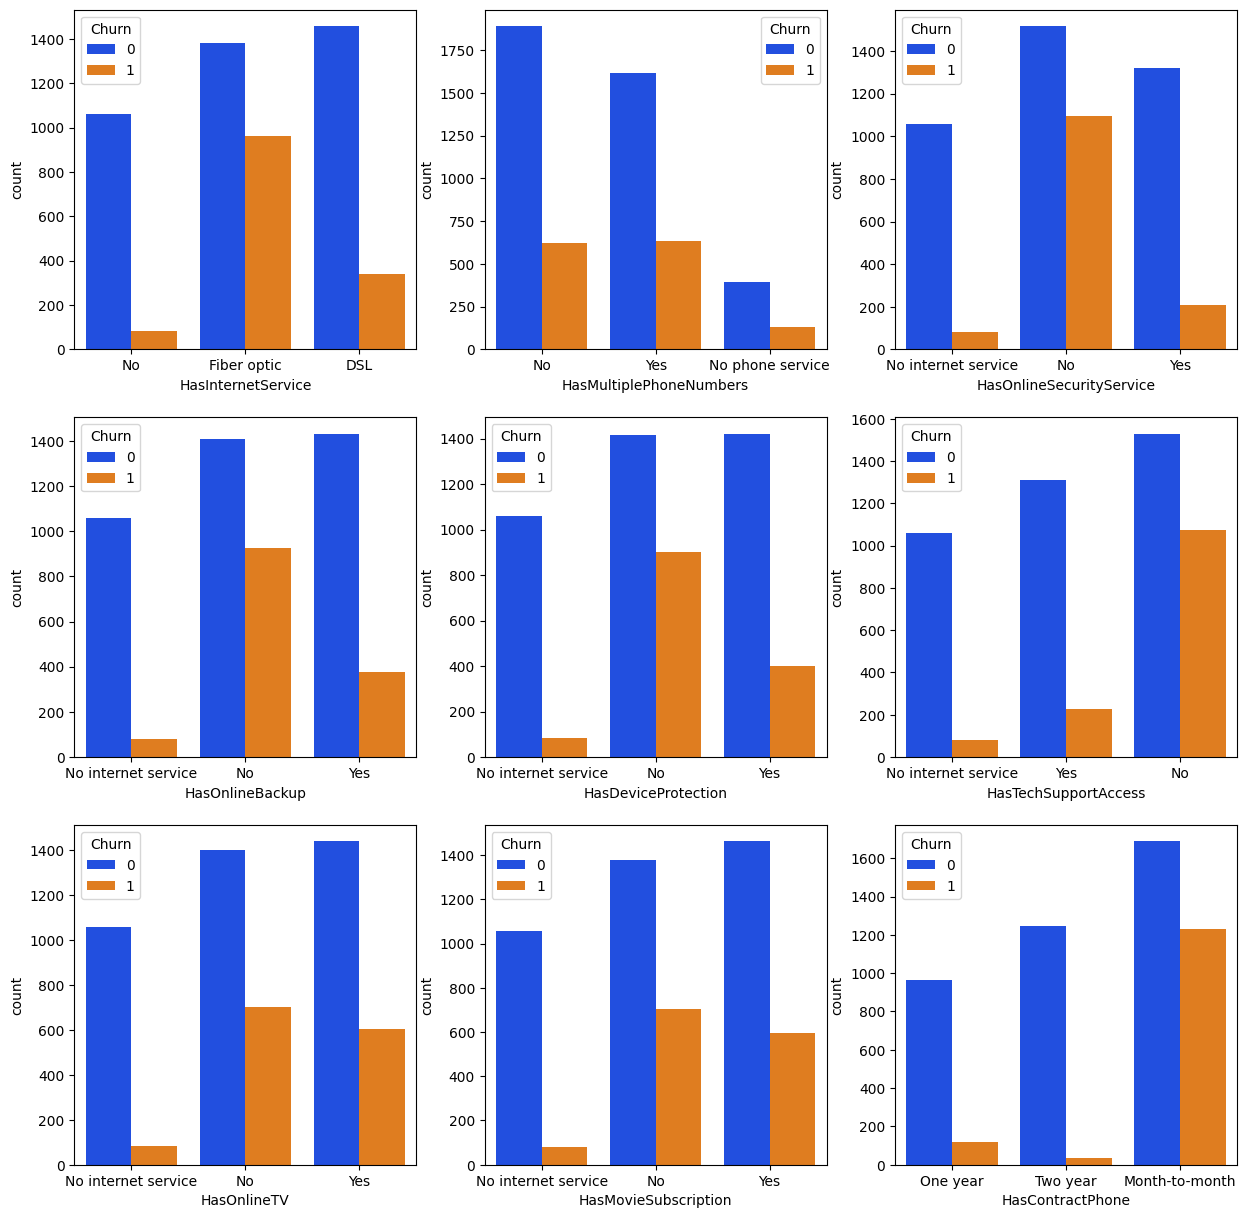

In [9]:
fig, axes = plt.subplots(3, 3, figsize=(15,15))

for i, ax in enumerate(axes.flat):
  sns.countplot(x=train[cat_cols[i]], hue=train['Churn'], palette='bright',ax=ax)
  #ax.set_title(f'{cat_cols[i]}')

plt.show()

## Предобработка

In [10]:
def drop_columns(X, cols):
  X = X.drop(cols, axis=1)

  return X

In [11]:
def gen_new_columns(X):

  for col in ['ClientPeriod', 'TotalSpent']:
    low = X[col].quantile(.05)
    high = X[col].quantile(.95)
    X[col] = X[col].clip(low, high)

  #Новые фичи
  X['MonTotRatio'] = X['MonthlySpending'] / (X['TotalSpent'] + 1)
  X['MonSpenPer'] = X['MonthlySpending']/(X['ClientPeriod'] + 1)
  X['HighSpend'] = (X['MonthlySpending'] > X['MonthlySpending'].median()).astype(int)

  return X

In [12]:
def encode_columns(X):

  #X['Sex'] = X['Sex'].map({'Male': 0, 'Female' : 1})

  for col in ['HasOnlineSecurityService', 'HasOnlineBackup', 'HasDeviceProtection', 'HasTechSupportAccess', 'HasOnlineTV', 'HasMovieSubscription']:
    X[col] = X[col].map({'No internet service' : -1, 'No' : 0, 'Yes' : 1})

  for col in ['HasChild', 'HasPartner', 'IsBillingPaperless']:
    X[col] = X[col].map({'Yes' : 1, 'No' : 0})

  X['HasInternetService'] = X['HasInternetService'].map({'Fiber optic' : -1, 'DSL' : 0, 'No' : 1})
  X['HasMultiplePhoneNumbers'] = X['HasMultiplePhoneNumbers'].map({'No phone service' : 0, 'No' : 1, 'Yes' : 1})
  X['HasContractPhone'] = X['HasContractPhone'].map({'Month-to-month' : 0, 'Two year' : 1, 'One year' : 1})
  X['PaymentMethod'] = X['PaymentMethod'].map({'Mailed check':0, 'Credit card (automatic)':1, 'Bank transfer (automatic)':2, 'Electronic check' : 3})

  return X


In [13]:
preprocessing = Pipeline(steps=[
    ('drop', FunctionTransformer(drop_columns,
                                 kw_args={'cols' : ['HasPhoneService', 'Sex']}
                                 )),
    ('add', FunctionTransformer(gen_new_columns)),
    ('encode', FunctionTransformer(encode_columns)),
    ('scale', ColumnTransformer(transformers=[
        ('scaler', StandardScaler(), num_cols + ['MonTotRatio', 'MonSpenPer', 'HighSpend'])
    ], remainder='passthrough'
    ))
])

preprocessing.set_output(transform='pandas')

Pipeline(steps=[('drop',
                 FunctionTransformer(func=<function drop_columns at 0x7c1aaaad84a0>,
                                     kw_args={'cols': ['HasPhoneService',
                                                       'Sex']})),
                ('add',
                 FunctionTransformer(func=<function gen_new_columns at 0x7c1aaaad8540>)),
                ('encode',
                 FunctionTransformer(func=<function encode_columns at 0x7c1aaae42980>)),
                ('scale',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', StandardScaler(),
                                                  ['ClientPeriod',
                                                   'MonthlySpending',
                                                   'TotalSpent', 'MonTotRatio',
                                                   'MonSpenPer',
                                                   'HighSpend'])]))])

In [14]:
target = train['Churn']
train = train.drop(['Churn'], axis=1)

preprocessing.fit(train)
train = preprocessing.transform(train)
test = preprocessing.transform(test)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(train,
                                                    target,
                                                    test_size=.3,
                                                    random_state=42)

## Модели

In [22]:
def test_report(y_true, y_pred):
  print(classification_report(y_true, y_pred))
  print('ROC_AUC_SCORE: ', roc_auc_score(y_test, y_pred))


In [33]:
def plot_roc_curves(y_test, y_pred):
  plt.figure(figsize=(7,5))

  for y_pred_i in y_pred:
    fpr, tpr, th = roc_curve(y_test, y_pred_i[0])
    plt.plot(fpr, tpr, label=f'{y_pred_i[1]}')

  plt.plot([0, 1], [0, 1], 'k--')
  plt.legend()
  plt.grid()
  plt.show()


In [34]:
def create_report_series(models, X_train, X_test, y_train, y_test, pt=False):
  model_roc_auc = []
  model_name = []
  model_pred = []

  if pt==0:
    for model in models:
      model.fit(X_train, y_train)

  for model in models:
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    y_pred = model.predict(X_test)

    model_roc_auc.append(roc_auc_score(y_test, y_pred))
    model_name.append(model.__class__.__name__)
    model_pred.append(y_pred_proba)

  s = pd.Series(model_roc_auc, index=model_name)
  print(s)

  plot_roc_curves(y_test, zip(model_pred, model_name))

In [27]:
lr = LogisticRegression(penalty='l1',
                        solver='liblinear',
                        C = 10,
                        max_iter=200,
                        class_weight='balanced'
                        )

rf = RandomForestClassifier(n_estimators=2000,
                            criterion='entropy',
                            max_depth=10,
                            min_samples_leaf=10,
                            class_weight='balanced'
                            )

xgb = XGBClassifier(n_estimators=500,
                    max_depth=3,
                    learning_rate=.01,
                    scale_pos_weight=2.816473988439306,
                    eval_metric='aucpr',
                    n_jobs=-1)

lgbm = LGBMClassifier(class_weight='balanced',
                      n_estimators=500,
                      learning_rate=.01,
                      max_depth=2,
                      boosting_type='gbdt',
                      verbose=-1
                      )

svm_ = SVC(C=0.01,
           kernel='linear',
           class_weight='balanced',
           probability=True)

models = [('lr',lr),
          ('xgb', xgb),
          ('rf', rf),
          ('sxm', svm_),
          ('lgbm', lgbm)]

stack = StackingClassifier(models,
                          cv=None,
                          n_jobs=4,
                          final_estimator=LogisticRegression(max_iter=500,
                                                             class_weight='balanced'))
stack2 = StackingClassifier(models,
                          cv=4,
                          n_jobs=4,
                          final_estimator=SVC(probability=True,
                                              C=.9,
                                              kernel='linear',
                                              class_weight='balanced'))

LogisticRegression        0.758213
RandomForestClassifier    0.738701
XGBClassifier             0.763133
LGBMClassifier            0.757698
SVC                       0.751878
StackingClassifier        0.754910
StackingClassifier        0.759327
dtype: float64


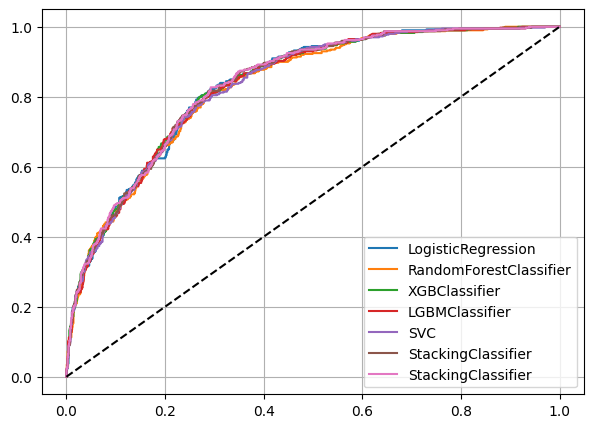

In [35]:
create_report_series([lr, rf, xgb, lgbm, svm_, stack, stack2],
                     X_train, X_test,
                     y_train, y_test)

In [37]:
def plot_score(scores):
  scores = scores.sort_values()
  width = np.arange(len(scores))
  ticks = list(scores.index)

  plt.barh(width, scores)
  plt.yticks(width, ticks)
  plt.show()

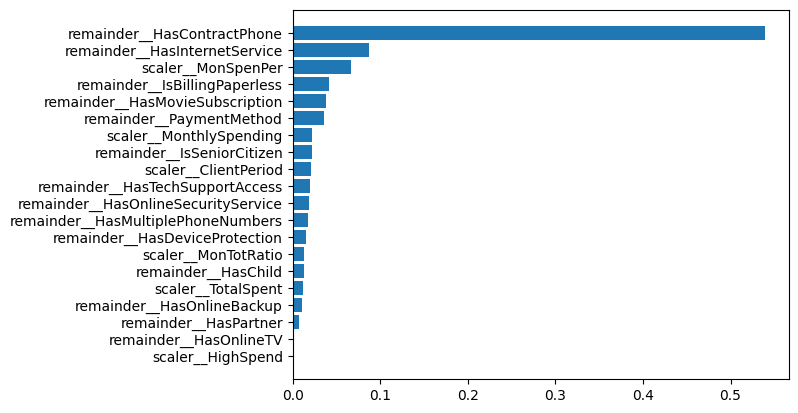

In [38]:
fi = pd.Series(xgb.feature_importances_, index=train.columns)
plot_score(fi)